In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [5]:
bank_marketing_csv = "data/bank_marketing/bank-full.csv"

In [6]:
bank_data = pd.read_csv(bank_marketing_csv, sep=";")

In [7]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
init_report = ProfileReport(bank_data)

In [9]:
init_report.to_file(f'bank_marketing_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 50.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
numerical_bank_data = bank_data[["balance", "duration", "campaign", "pdays", "previous"]]

In [12]:
numerical_bank_data

,balance,duration,campaign,pdays,previous
0,2143,261,1,-1,0
1,29,151,1,-1,0
2,2,76,1,-1,0
3,1506,92,1,-1,0
4,1,198,1,-1,0
...,...,...,...,...,...
45206,825,977,3,-1,0
45207,1729,456,2,-1,0
45208,5715,1127,5,184,3
45209,668,508,4,-1,0


In [13]:
numerical_bank_data.describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [43]:
std_scaler = StandardScaler().fit(numerical_bank_data)
minmax_scaler = MinMaxScaler().fit(numerical_bank_data)
robust_scaler = RobustScaler().fit(numerical_bank_data)

std_data = std_scaler.transform(numerical_bank_data)
minmax_data = minmax_scaler.transform(numerical_bank_data)
robust_data = robust_scaler.transform(numerical_bank_data)

std_df = pd.DataFrame(std_data, columns=["balance", "duration", "campaign", "pdays", "previous"])
minmax_df = pd.DataFrame(minmax_data, columns=["balance", "duration", "campaign", "pdays", "previous"])
robust_df = pd.DataFrame(robust_data, columns=["balance", "duration", "campaign", "pdays", "previous"])

In [47]:
std_df.describe()

,balance,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,1.760208e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-3.081149e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-4.237719e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-3.002800e-01,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,2.158743e-02,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,3.309478e+01,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


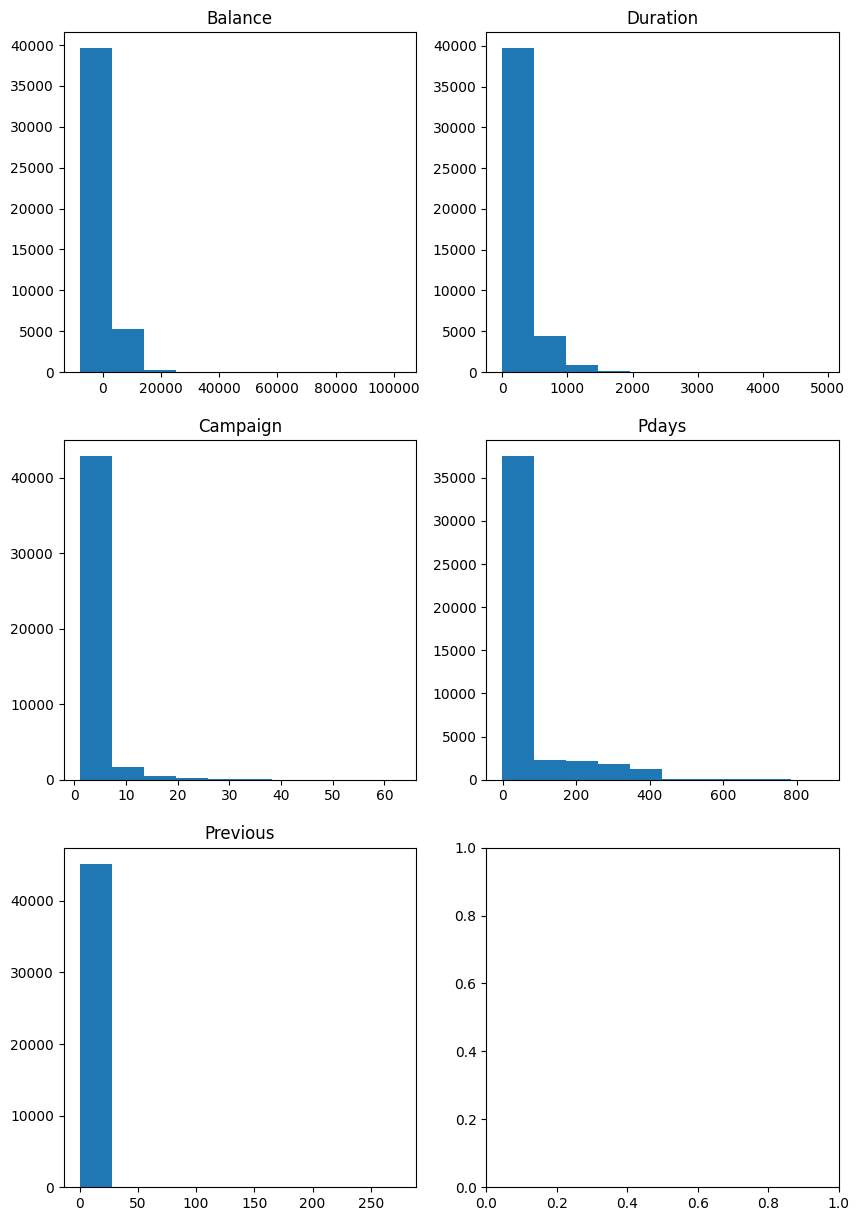

In [28]:
fig, axes = plt.subplots(3,2, figsize=(10,15))

axes[0,0].hist(numerical_bank_data["balance"], bins=10)
axes[0,0].set_title("Balance")

axes[0,1].hist(numerical_bank_data["duration"])
axes[0,1].set_title("Duration")

axes[1,0].hist(numerical_bank_data["campaign"])
axes[1,0].set_title("Campaign")

axes[1,1].hist(numerical_bank_data["pdays"])
axes[1,1].set_title("Pdays")

axes[2,0].hist(numerical_bank_data["previous"])
axes[2,0].set_title("Previous")

plt.show()

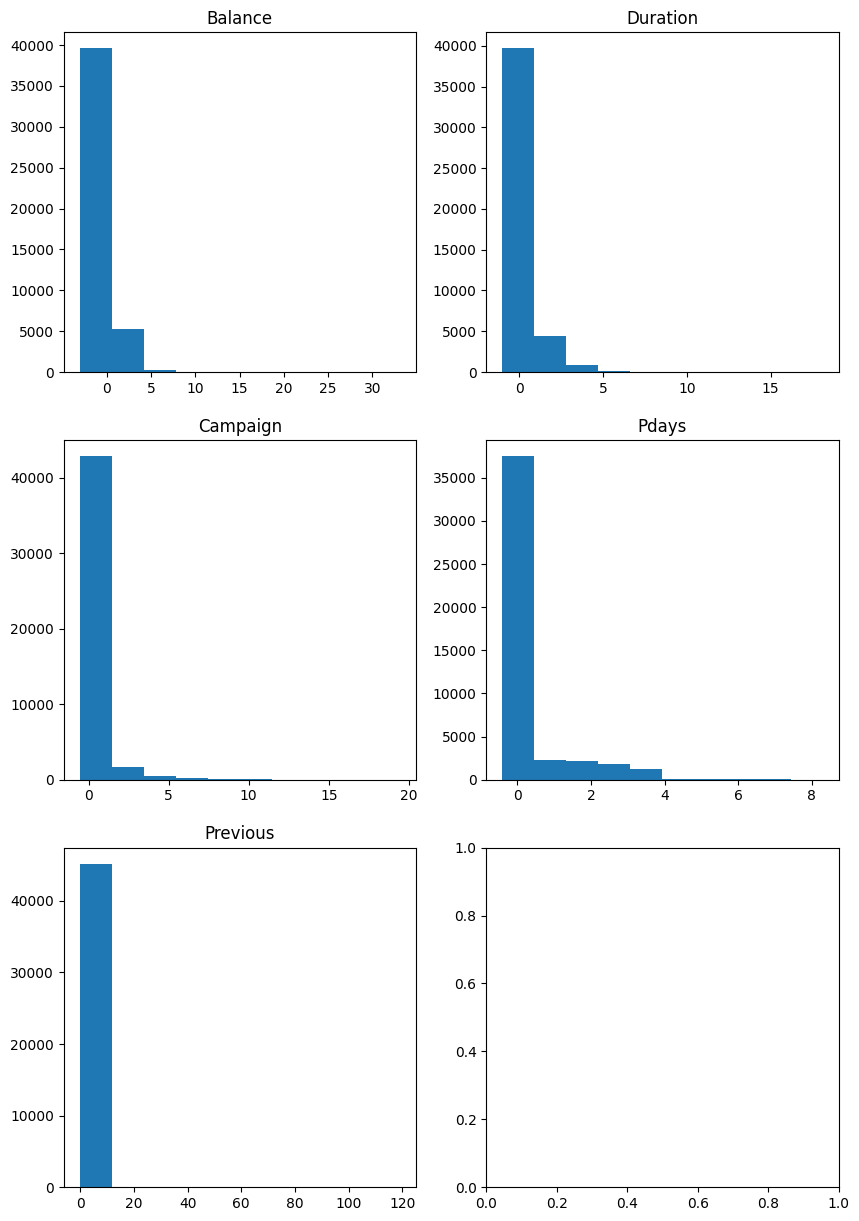

In [44]:
fig, axes = plt.subplots(3,2, figsize=(10,15))

axes[0,0].hist(std_df["balance"], bins=10)
axes[0,0].set_title("Balance")

axes[0,1].hist(std_df["duration"])
axes[0,1].set_title("Duration")

axes[1,0].hist(std_df["campaign"])
axes[1,0].set_title("Campaign")

axes[1,1].hist(std_df["pdays"])
axes[1,1].set_title("Pdays")

axes[2,0].hist(std_df["previous"])
axes[2,0].set_title("Previous")

plt.show()

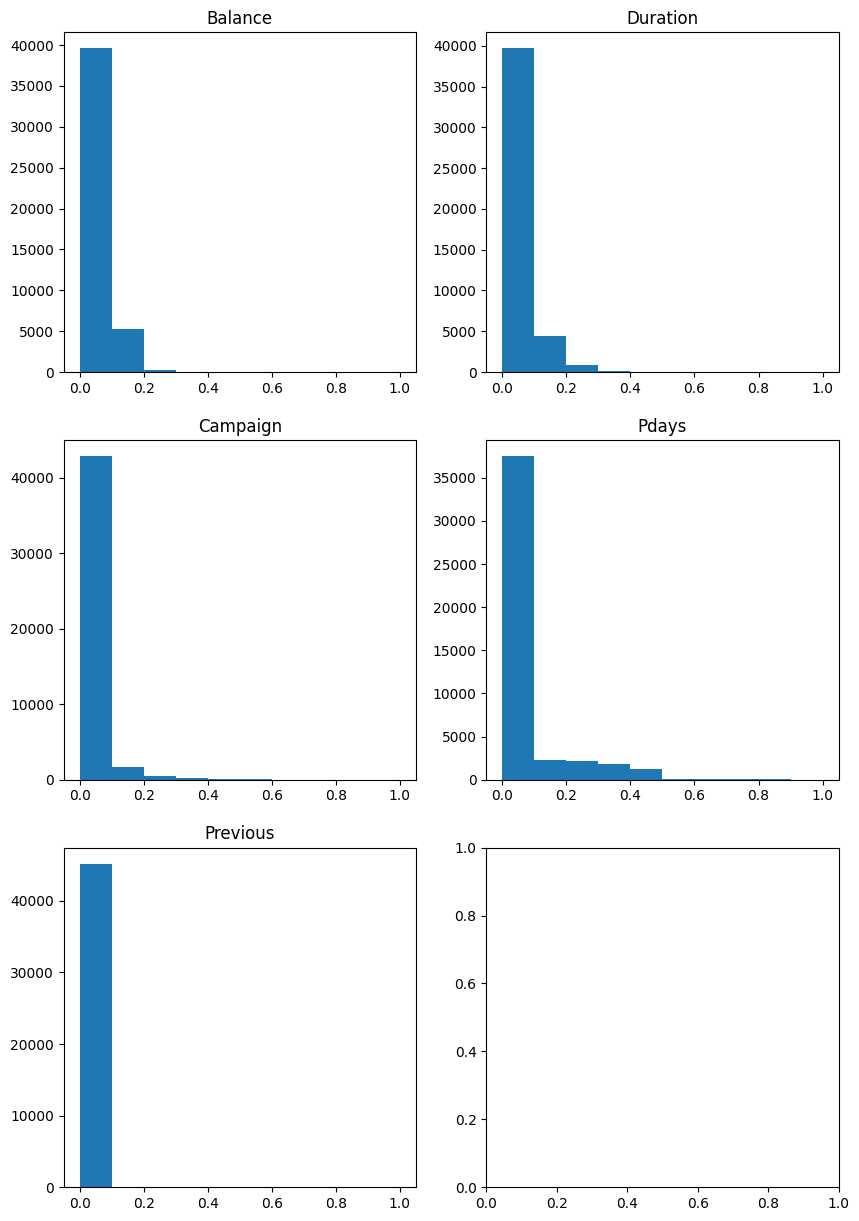

In [45]:
fig, axes = plt.subplots(3,2, figsize=(10,15))

axes[0,0].hist(minmax_df["balance"], bins=10)
axes[0,0].set_title("Balance")

axes[0,1].hist(minmax_df["duration"])
axes[0,1].set_title("Duration")

axes[1,0].hist(minmax_df["campaign"])
axes[1,0].set_title("Campaign")

axes[1,1].hist(minmax_df["pdays"])
axes[1,1].set_title("Pdays")

axes[2,0].hist(minmax_df["previous"])
axes[2,0].set_title("Previous")

plt.show()

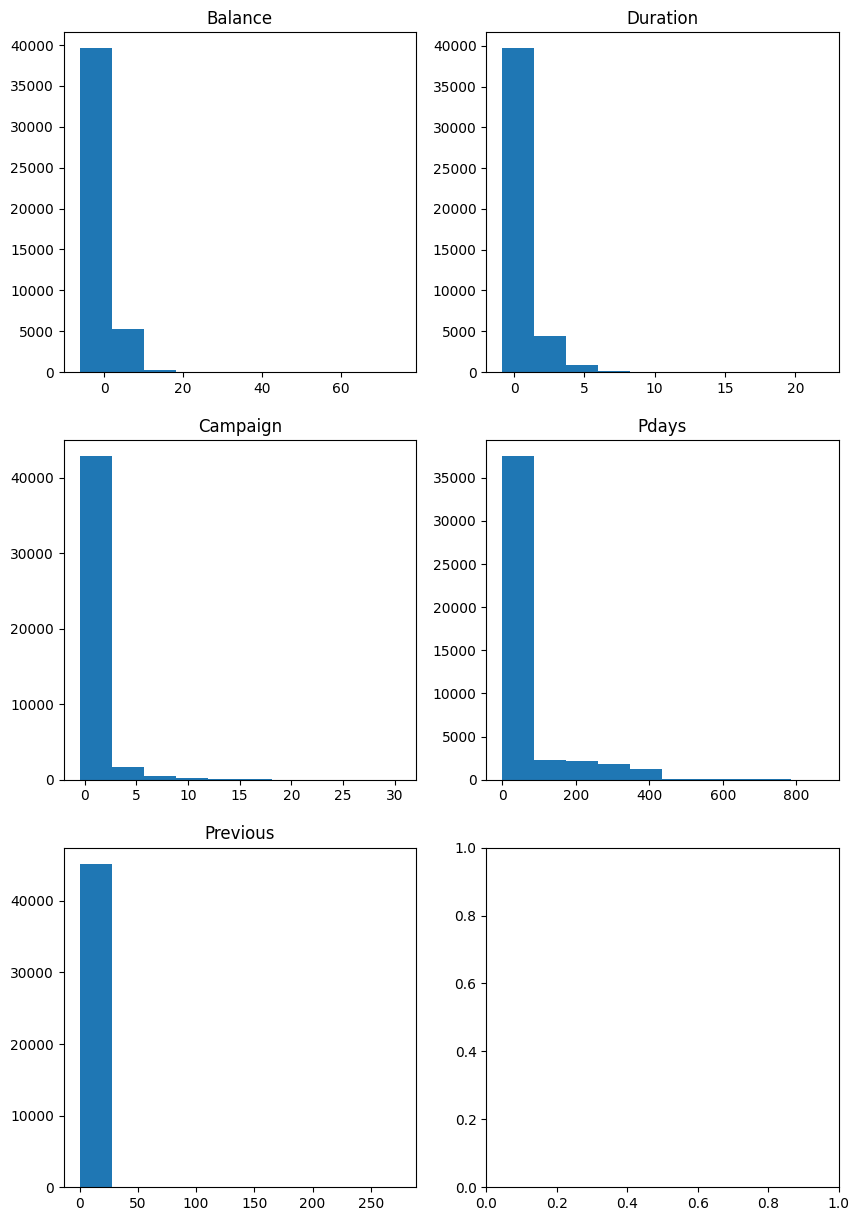

In [46]:
fig, axes = plt.subplots(3,2, figsize=(10,15))

axes[0,0].hist(robust_df["balance"], bins=10)
axes[0,0].set_title("Balance")

axes[0,1].hist(robust_df["duration"])
axes[0,1].set_title("Duration")

axes[1,0].hist(robust_df["campaign"])
axes[1,0].set_title("Campaign")

axes[1,1].hist(robust_df["pdays"])
axes[1,1].set_title("Pdays")

axes[2,0].hist(robust_df["previous"])
axes[2,0].set_title("Previous")

plt.show()